In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
from matplotlib import colormaps
import matplotlib.colors as mcolors

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [19]:
# get the colors and genus in descending order as previously defined in script: M2_DefineColors
goodColors = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_ColorsRGB.npy')
goodColorsHEX = np.load('//home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_ColorsHEX.npy')
genus_descending = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_genusDescending.npy')

# set the paramter q
q = 2

In [20]:
# define functions:

def alphaDiv(p,q):
    # input
    ## -- p_i: the abundancy of the genus/species as an np.array
    ## -- q: the paramter for the generalized mean
    div = np.sum(p**q)**(1/(1-q))
    return div

def Shannon(p):
    # input
    ## -- p_i: the abundancy of the genus/species as an np.array
    ## -- q: the paramter for the generalized mean
    p_woZero = p[p!=0]
    div = -np.sum(p_woZero*np.log(p_woZero))
    return div

In [21]:
# read in data to panda

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/"
file_motu="motus_Merge_genus_032024_0minFrac_FromPY"
file_kra="KraBracken_DBplusPf_042024_0minFrac_genus_FromPY"

df_motu=pd.read_csv(InPath+file_motu+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])
df_kra=pd.read_csv(InPath+file_kra+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])

threshold = 0.01
print(df_kra.shape)


(93, 1294)


# Idea:
- ...

In [22]:
# get an array with alpha values for the samples 
### for MOTU!!!

df_kra_namesShort = np.array(df_kra.iloc[:,0])  # get the names
df_kra_alpha = np.zeros(df_kra.shape[0])
df_kra_shannon = np.zeros(df_kra.shape[0])

for i in range(df_kra.shape[0]):
    df_kra_alpha[i] = alphaDiv(np.array(df_kra.iloc[i,1:]),3)
    df_kra_shannon[i] = Shannon(np.array(df_kra.iloc[i,1:]))

# add it to the df
df_kra['alpha'] = df_kra_alpha
df_kra['shannon'] = df_kra_shannon

In [23]:
# get an array with alpha values for the samples 
### for kraken!!!

df_motu_namesShort = np.array(df_motu.iloc[:,0])  # get the names
df_motu_alpha = np.zeros(df_motu.shape[0])
df_motu_shannon = np.zeros(df_motu.shape[0])

for i in range(df_motu.shape[0]):
    df_motu_alpha[i] = alphaDiv(np.array(df_motu.iloc[i,1:]),q)
    df_motu_shannon[i] = Shannon(np.array(df_motu.iloc[i,1:]))

# add it to the df
df_motu['alpha'] = df_motu_alpha
df_motu['shannon'] = df_motu_shannon


In [24]:
#  get a unindexed version of df_kra
df_kra_inst = df_kra.reset_index()

a = df_kra_inst['institution'].tolist()
b = df_kra_inst['treatment'].tolist()

df_kra_inst.set_index('institution', inplace=True)


a_withLine = [m+"_" for m in a]
inst_treat = [m+str(n) for m,n in zip(a_withLine,b)]

## add inst_treat to the new frame
df_kra_inst.insert(4, "inst_treat", inst_treat, True)

In [25]:
## get different subsets of the data!
df_kraBB = df_kra_inst.loc[(df_kra_inst['treatment']=="bb")]

#df_kraBB = df_kra.loc[(df_kra['treatment']=="bb") | (overview['treatment']=="anc")]
df_kranoBB = df_kra_inst.loc[(df_kra_inst['treatment']!="bb")]
df_kraW0 = df_kra_inst.loc[(df_kra_inst['week']==0)]
df_kraW1 = df_kra_inst.loc[(df_kra_inst['week']==1)]
df_kraW15 = df_kra_inst.loc[(df_kra_inst['week']==15)]


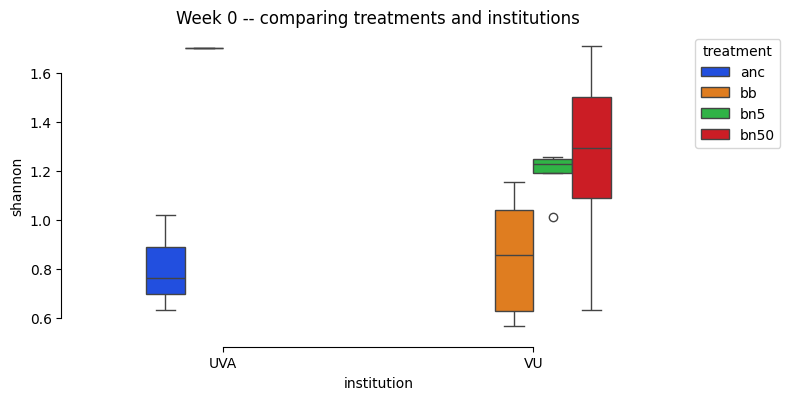

In [26]:
## hypothesis: different treatments start out with different diversity from the start:

f1, ax1 = plt.subplots(figsize=(8, 4))#, sharex=True)
plt.title('Week 0 -- comparing treatments and institutions')

sns.boxplot(data=df_kraW0, x="institution", y="shannon", hue="treatment", palette="bright", width = 0.5, ax=ax1)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)

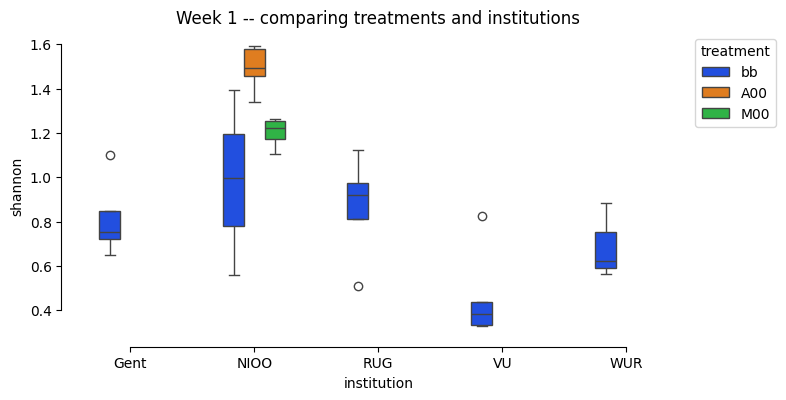

In [27]:
## hypothesis: different treatments start out with different diversity from the start:

f1, ax1 = plt.subplots(figsize=(8, 4))#, sharex=True)
plt.title('Week 1 -- comparing treatments and institutions')

sns.boxplot(data=df_kraW1, x="institution", y="shannon", hue="treatment", palette="bright", width = 0.5, ax=ax1)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)

Text(0.5, 1.0, 'Week 15 -- comparing institutions')

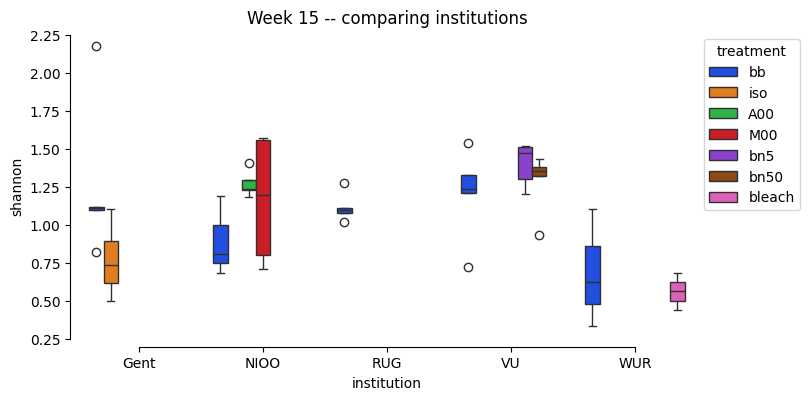

In [28]:
## hypothesis: the different conditions per institution make sense .. right?

f2, ax2 = plt.subplots(figsize=(8, 4))#, sharex=True)

sns.boxplot(data=df_kraW15, x="institution", y="shannon", hue="treatment", palette="bright", ax=ax2)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)
plt.title('Week 15 -- comparing institutions')

Text(0.5, 1.0, 'comparing timepoints for institutions+treatments')

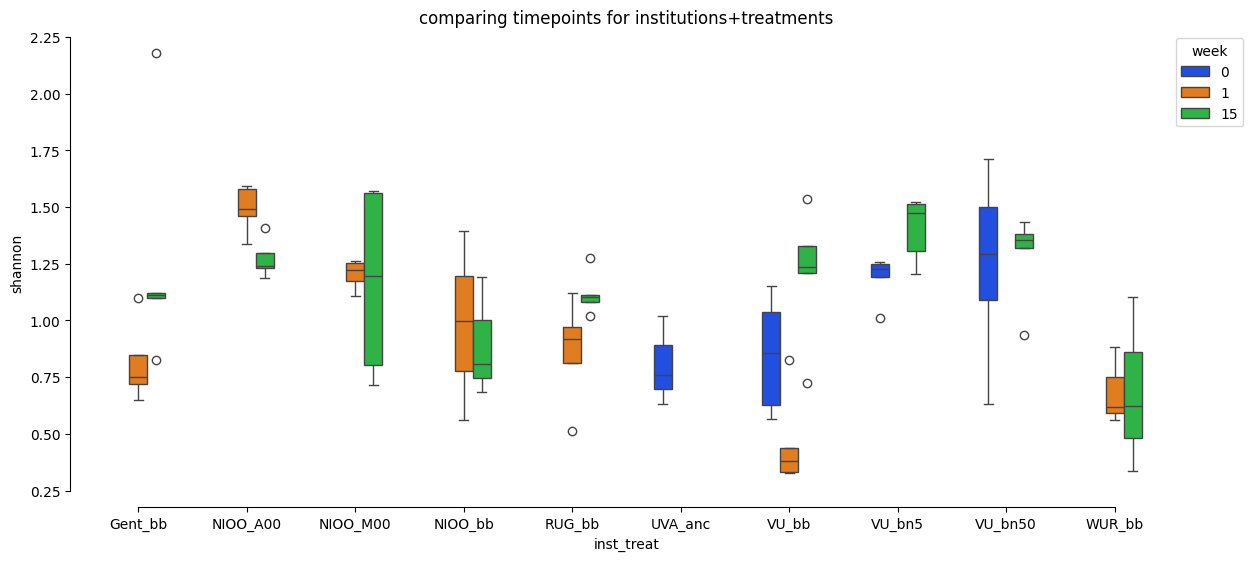

In [38]:
## hypothesis: diversity goes down over time ... or does it?
df_kra_inst_onlyBothTime = df_kra_inst.loc[(df_kra_inst['inst_treat']!="Gent_iso") & (df_kra_inst['inst_treat']!="WUR_bleach") & (df_kra_inst['inst_treat']!="UVA_bb")]

fig3, ax3 = plt.subplots(figsize=(14,6))
ax3 = sns.boxplot(data=df_kra_inst_onlyBothTime.sort_index(), x="inst_treat", y="shannon", hue="week", palette="bright", width=0.5)
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=10, trim=True)
plt.title('comparing timepoints for institutions+treatments')

Text(0.5, 1.0, 'Week 15 -- comparing treatments')

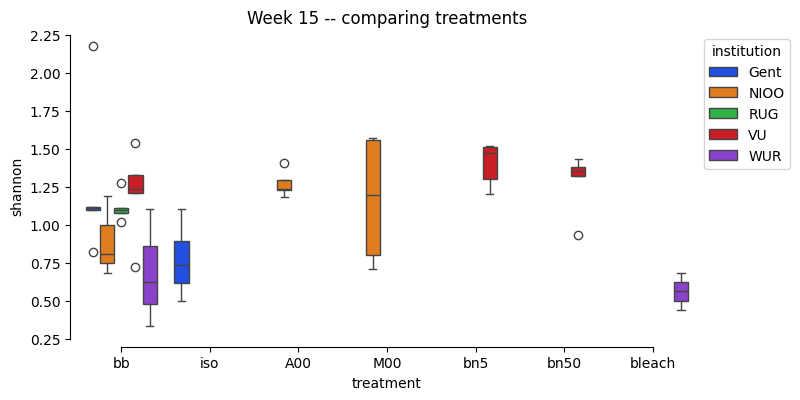

In [90]:
## hypothesis: different treatments have different diversity at the end of evolution

fig4, ax4 = plt.subplots(figsize=(8,4))
ax4 = sns.boxplot(data=df_kraW15, x="treatment", y="shannon", hue="institution", palette="bright")
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)
plt.title('Week 15 -- comparing treatments')

(array([ 6., 17., 13., 29., 17., 10.,  0.,  1.,  0.]),
 array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ]),
 <BarContainer object of 9 artists>)

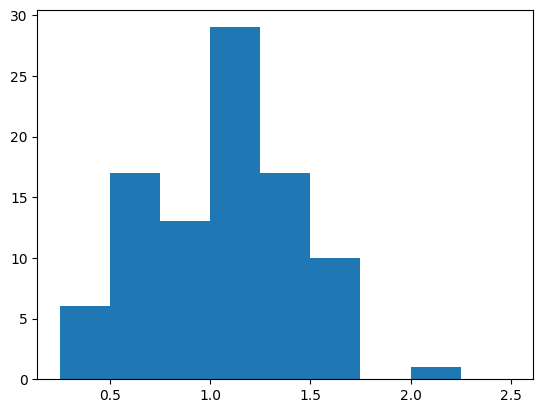

In [89]:
plt.hist(df_kra['shannon'],  bins=[0.25,0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])

In [14]:
len(df_kra['shannon'])

93